
<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor:Tomás Fontecilla</em><br>

</div>

# Machine Learning- Tarea 1


**Fecha de Entrega**: 07 de Septiembre de 2024 a las 12:00 pm

** Grupo**: `Grupo 5`

**Nombre Estudiante(s)**: `Jeanette León Vejar` , 
                            `Joaquín Antonio Andrés Leiva Correa`. 
                            `Adrián Alexis Espinoza Arévalo` y 
                            `Jocelyn Cáceres Pradel`

In [1]:
# Importar librerías

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Cargar los datos

wine_data = pd.DataFrame(load_wine().data,columns = load_wine().feature_names)

### 1. Exploración de datos
#### Métodos:

- `head()`: Nos permite revisar las primeras 5 filas del dataframe, mostrando como están estructurados los datos y conocer los nombre las columnas.
- `shape()`: Nos ayudar a saber las dimensiones del dataset, en esté caso el dataset wine_data tiene 178 filas y 13 columnas.
- `info()`: Este método nos muestra un resumen del dataset; el numéro de filas y columnas, los tipos de datos y si existen valores nulos. Para el dataset analizado las 13 columnas presenta sólo datos flotantes y no existen nulos.
- `describe()`: Nos muestra las estadísticas descriptiva del dataset; la media, la desviación estándar, percentil (25, 50 y 75) y los valores mínimos y máximo de cada columna del dataframe. Estas estadísticas son fundamentales para entender la distribución de los datos, identificar valores extremos (outliers) y ver la dispersión de los datos.
- `Verificar la distribución de datos categoricos`: Existen en dataset wine_data 3 tipos de clases de vinos ('class_1': 59, 'class_2': 71, 'class_3': 48). Es importar conocer esta distribución ya que si está desbalanceado, puede influir en el rendimiento del modelo.
- `Matriz de gráficos dipersión y histograma de densidad`: Permite ver la relación entre las distintas variables del dataset, identificando correlaciones lineales o no lineales. Además, se puede observar grupos y detección de outliers. En nuestro dataset wine_data, se ven pocos casos de patrones lineales.
- `Matriz de correlación`: Nos permite los valores de correlacion de las distintas variables del dataset, lo que es importa ya que si existen variables altamente correlacionadas, se sugere reducir la dimensionalidad a sólo a variables más relevantes. ya que pueden afectar al rendimiento del modelo.



In [33]:
# Mostrar las primeras 5 filas del dataframe
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [34]:
# Mostrar el tamaño del dataset
wine_data.shape

(178, 13)

In [35]:
# Obtener información general del dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [36]:
# Estadísticas descriptivas
wine_data.describe().round(4) # Redondear al cuarto decimal

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,1680.0000


In [37]:
# Distribución de clases de vinos 

unique, counts = np.unique(load_wine().target, return_counts=True)
print("Distribución de clases:", dict(zip(load_wine().target_names, counts)))

Distribución de clases: {'class_0': 59, 'class_1': 71, 'class_2': 48}


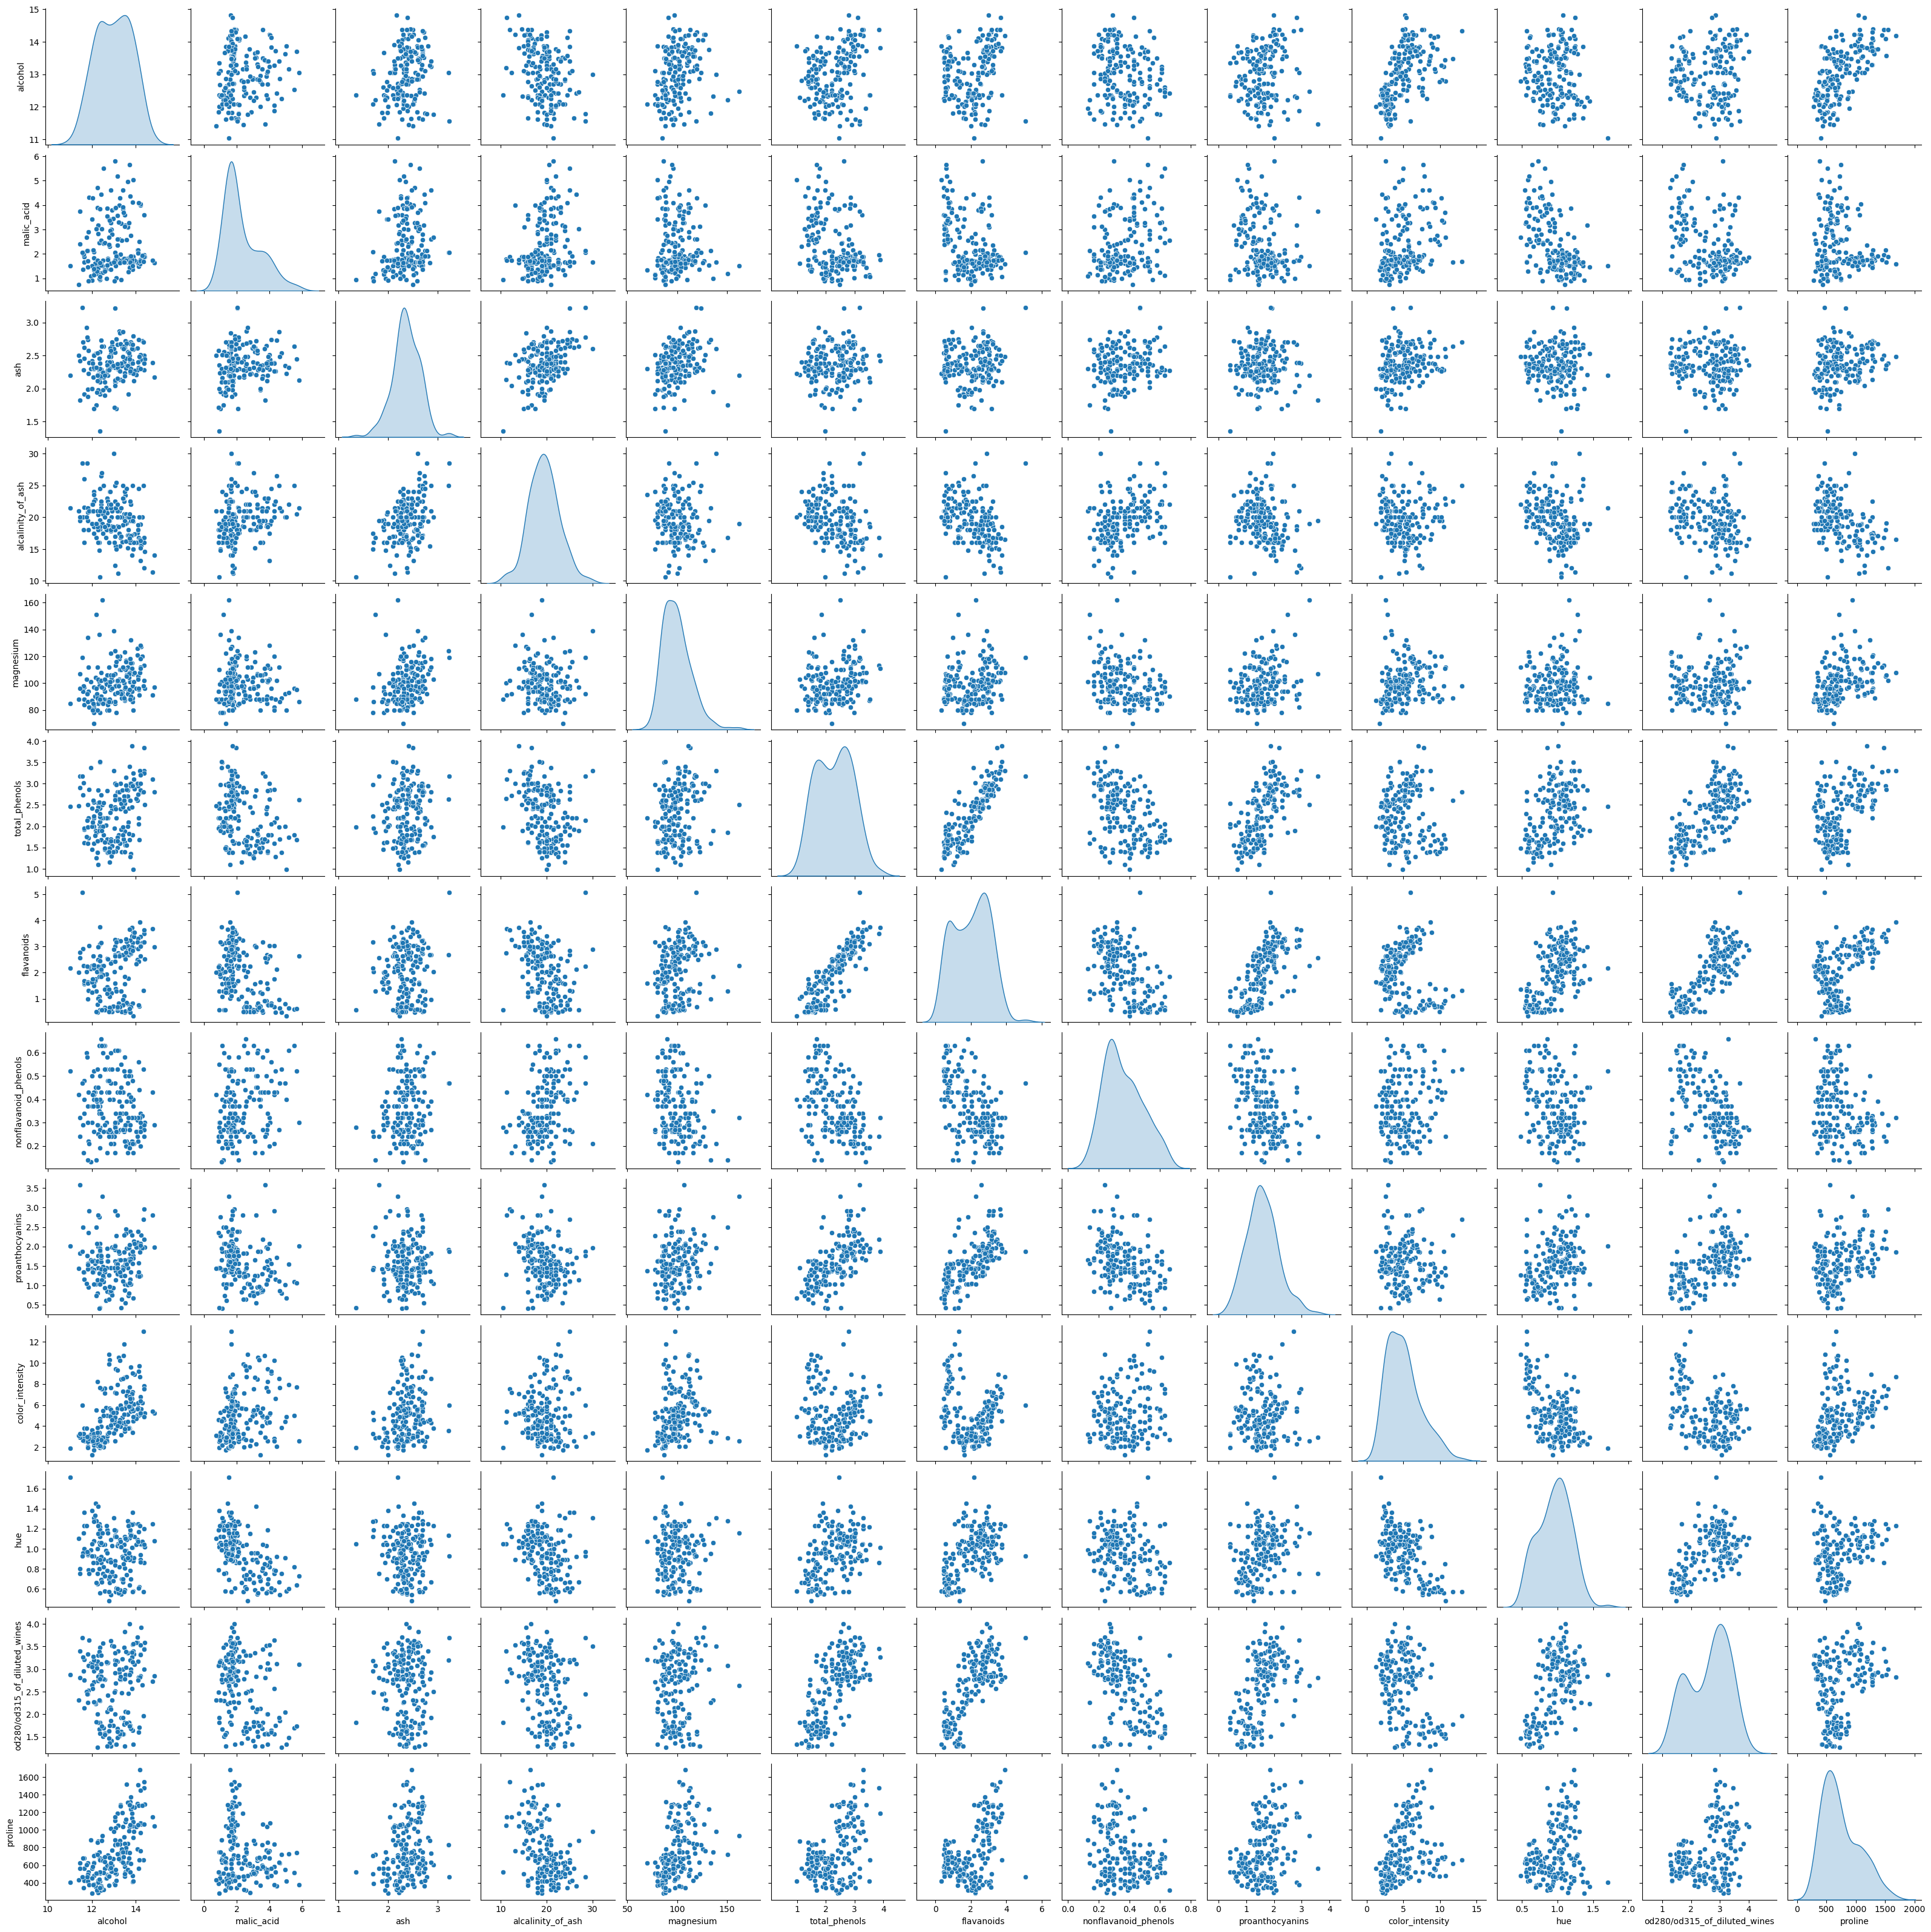

In [38]:
# Visualización de componentes principales en pares
sns.pairplot(wine_data, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

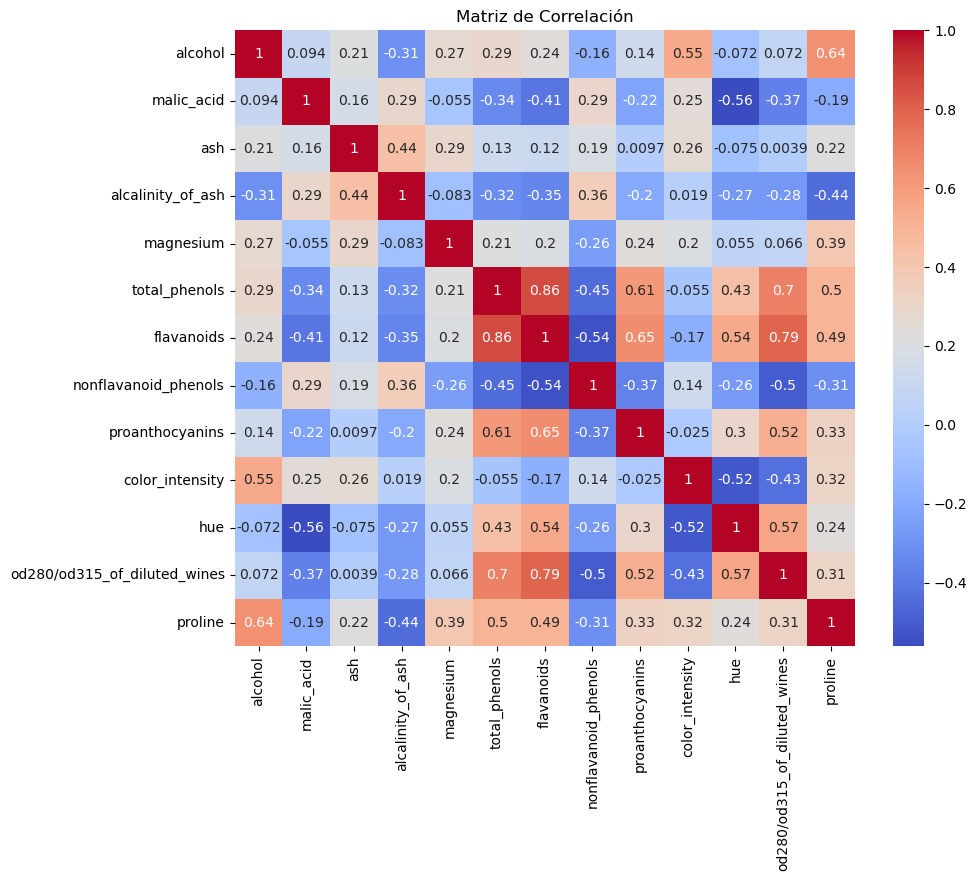

In [39]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [40]:
# Estandarizar los datos
X = StandardScaler(with_std=True, with_mean=True).fit_transform(wine_data)

# Convertir los datos estandarizados a un DataFrame y mostrar las primeras 5 filas
pd.DataFrame(X, columns=load_wine().feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


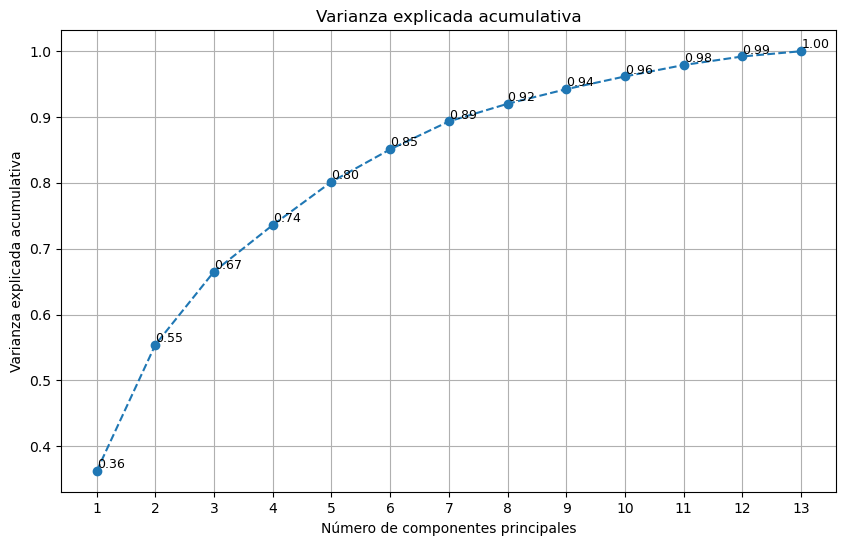

In [41]:
# Crear una instancia de PCA
pca = PCA()

# Aplicar PCA a tus datos estandarizados
principal_components = pca.fit_transform(X)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Crear la gráfica
plt.figure(figsize=(10, 6))
x_values = np.arange(1, len(explained_variance_ratio) + 1)
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(x_values, cumulative_variance, marker='o', linestyle='--')

# Etiquetas en los puntos
for x, y in zip(x_values, cumulative_variance):
    plt.text(x, y, f'{y:.2f}', fontsize=9, verticalalignment='bottom')

# Configurar el gráfico
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.xticks(x_values)  # Establecer el eje x con valores enteros
plt.grid(True)
plt.show()


In [42]:
explained_variance_ratio.round(2)

array([0.36, 0.19, 0.11, 0.07, 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02,
       0.01, 0.01])

Se escoge 8 componentes principales, ya que al observar el gráfico de varianza acumulada del octavo componente ya alcanza el 92% de varianza explicada del dataset data_wine, al reducir los componentes  permite trabajar con una versión más compacta del conjunto de datos, manteniendo una gran parte de la varianza original.

In [43]:
n_components = 8
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Ahora tienes tus datos reducidos a n_components características
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

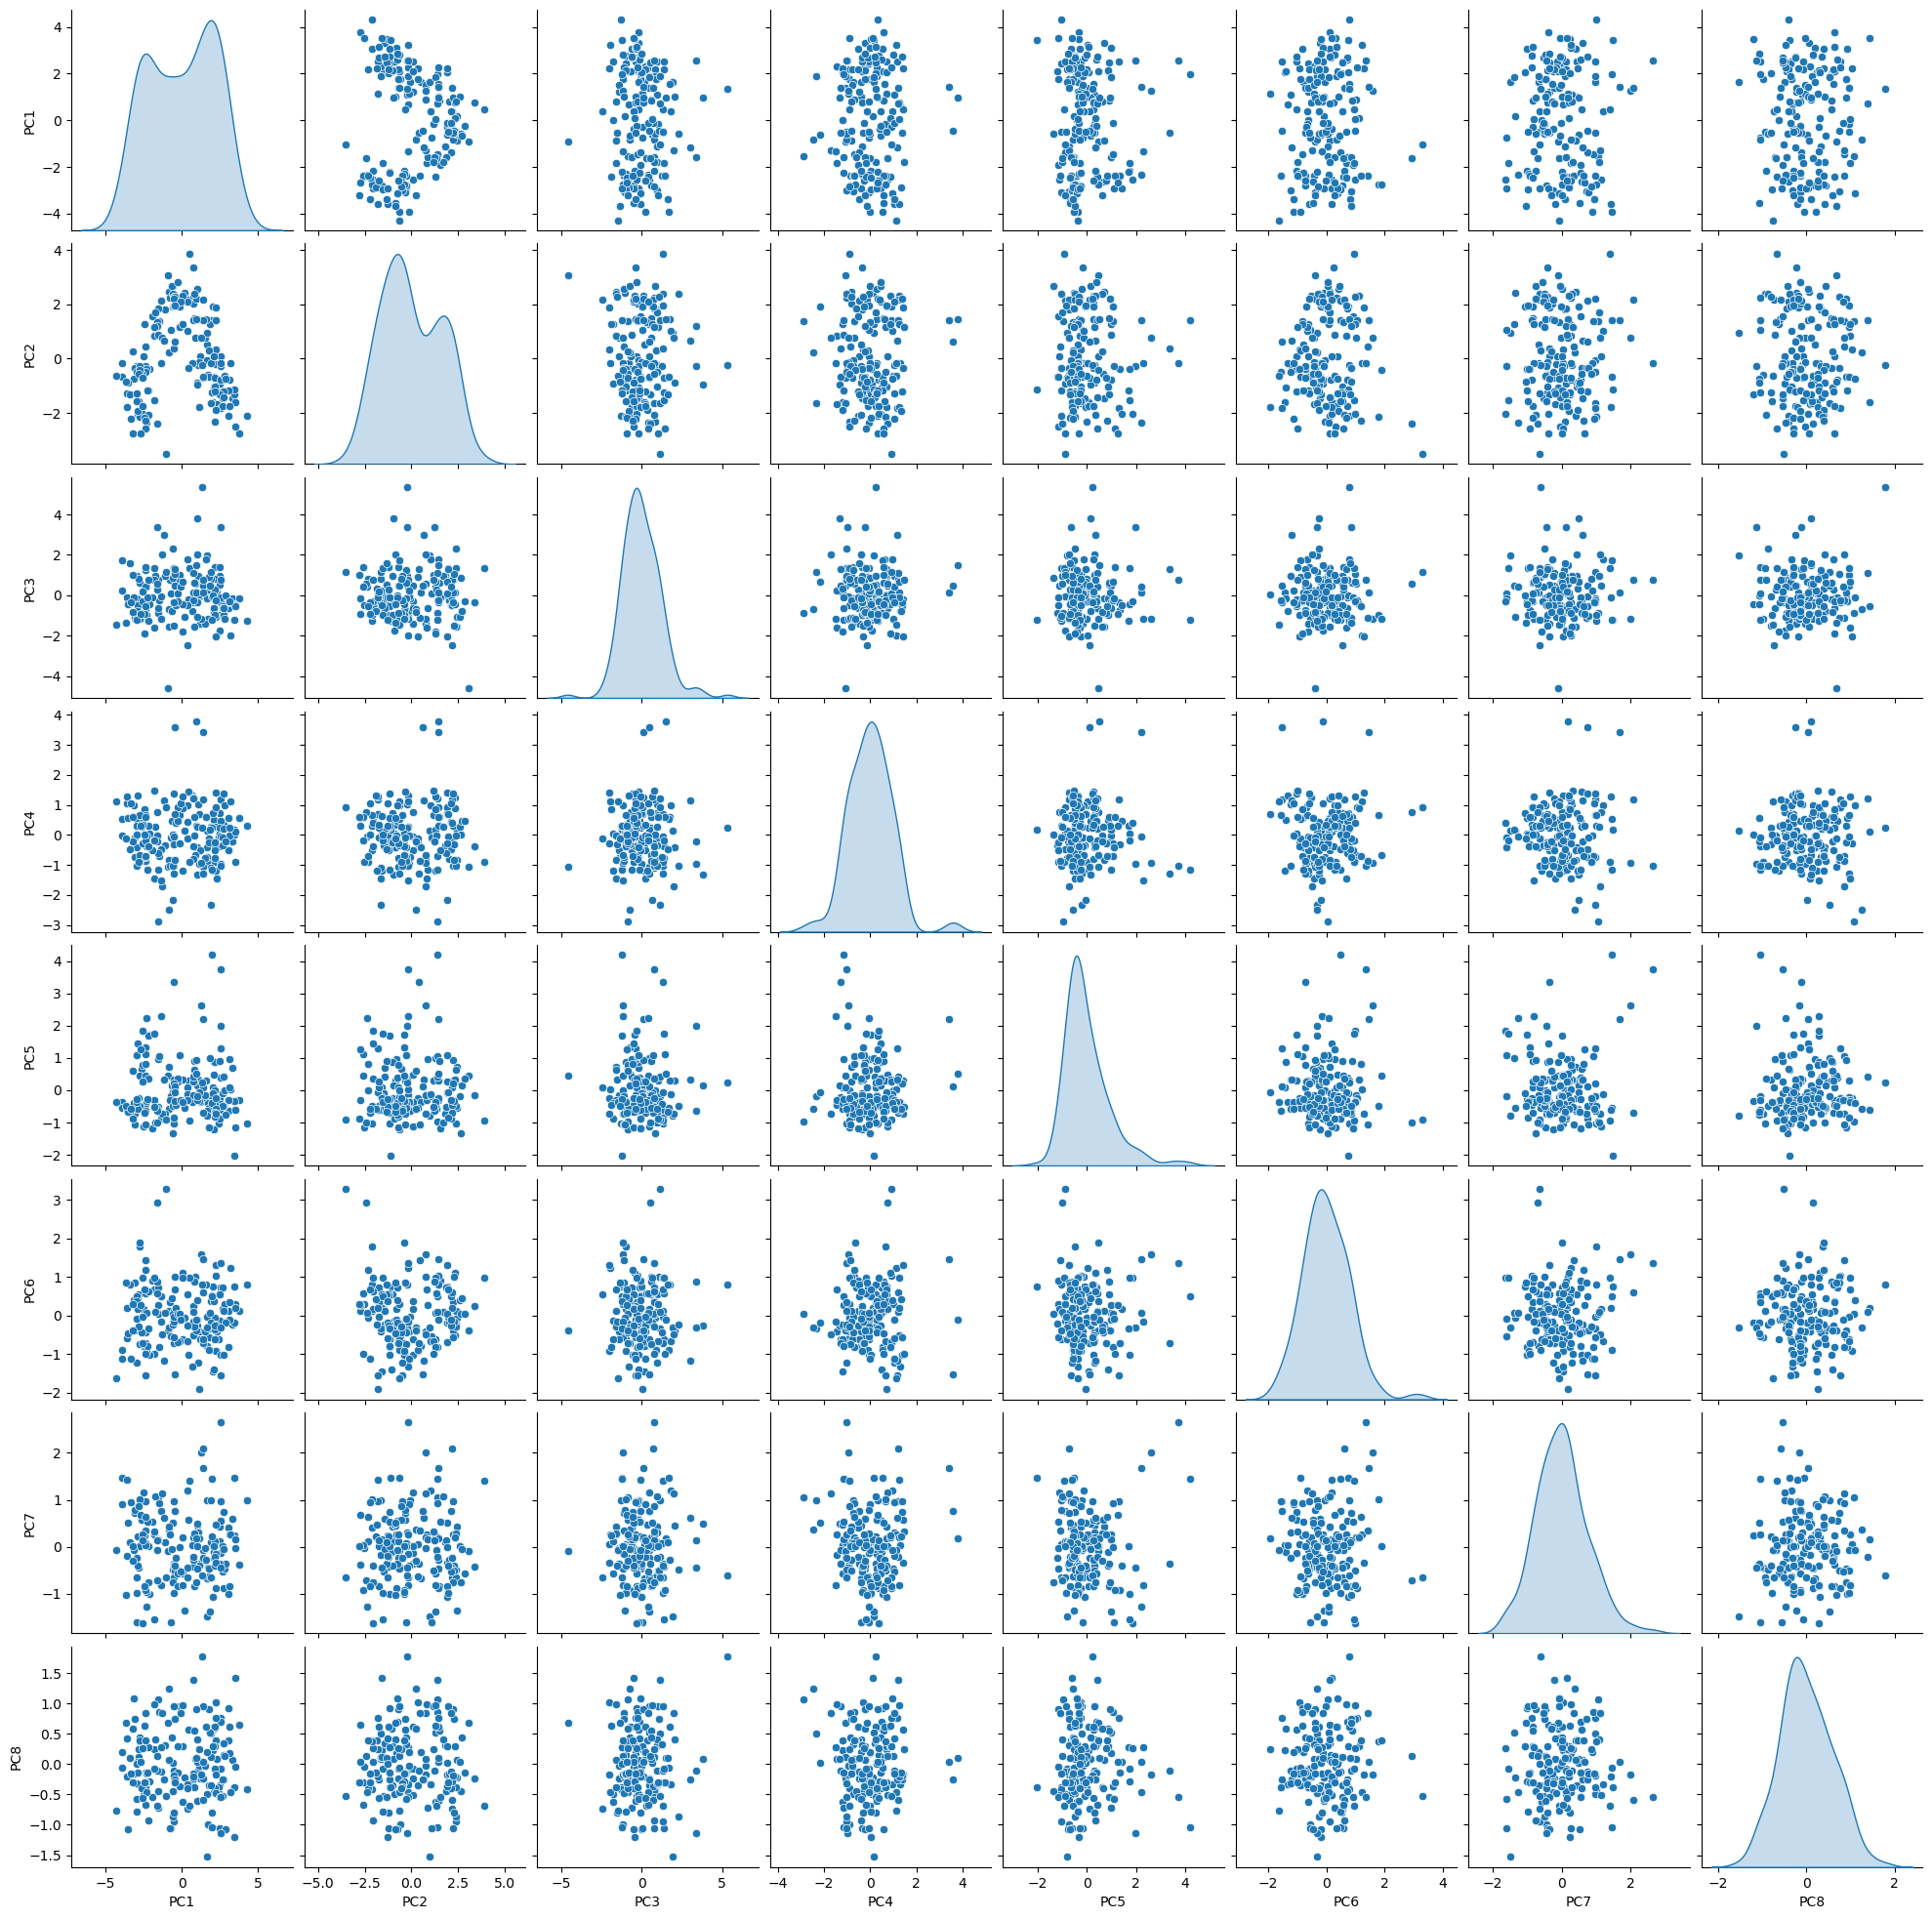

In [44]:
# Visualización de componentes principales en pares
sns.pairplot(pc_df, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

### 2. Selección de muestra y hiperparámetros
##### Nombre de hiperparámetros

Componente Principal 1 (PC1): `Características  sabor, el aroma y la estructura` .En este hiperparámentro la variables "flavanoids" y "total_phenols" tiene mayor carga absoluta (cercano al 0,4 c/u), y estas variables afecta tanto su sabor, el aroma y la estructura del vino.

Componente Principal 2 (PC2): `Propiedades del color y nivel alcohol`.En este hiperparámentro la variables "color_intensity" y "alcohol" tiene mayor carga absoluta (cercano al 0,4 c/u), y estos factores determina el color y nivel de alcohol del vino.

Componente Principal 3 (PC3): `Calidad y el origen del vino`. En este hiperparámentro la variables "ash" y "alcalinity_of_ash" tiene mayor carga absoluta (cercano al 0,5 c/u), y estas variables proporcionar información sobre la calidad y el origen del vino.

Componente Principal 4 (PC4): `Características de sabor, acidez y tonalidad del vino`. En este hiperparámentro la variables "malic_acid" y "hue" tiene mayor carga absoluta (cercano al 0,4 c/u), y la variable "malic_acid" nos entrega información sobre el sabor y acidez del vino y "hue" sobre su tonalidad.

Componente Principal 5 (PC5): `Caracteristica de sabor, astringencia y nivel de magnesio del vino`. En este hiperparámentro la variables "nonflavanoid_phenols" y "magnesium" tiene mayor carga absoluta (cercano al 0,5 c/u), y la variable "nonflavanoid_phenols" nos entrega información sobre el sabor, astringencia y "huemagnesium" sobre la cantidad de magnesio en el vino.

Componente Principal 6 (PC6): `Propiedades de sabor, acidez y capacidad de envejecimiento del vino`. En este hiperparámentro la variables "malic_acid" y "proanthocyanins" tiene mayor carga absoluta (cercano al 0,4 c/u), y la variable "malic_acid" nos entrega información sobre el sabor y acidez del vino y "proanthocyanins" sobre su capacidad de envejecimiento del vino.

Componente Principal 7 (PC7):  `Propiedades de sabor, astringencia y acidez del vino`. En este hiperparámentro la variables "nonflavanoid_phenols" y "malic_acid" tiene mayor carga absoluta (cercano al 0,4 y 05 respectivamente), y la variable "malic_acid" nos entrega información sobre el sabor y acidez del vino y "nonflavanoid_phenols" sobre nos entrega información sobre el sabor, astringencia.

Componente Principal 8 (PC8): `Características de acidez y tonalidad del vino`. En este hiperparámentro la variables "alcalinity_of_ash" y "hue" tiene mayor carga absoluta (cercano al 0,4 c/u), y la variable "alcalinity_of_ash" nos entrega información sobre el sabor y acidez total del vino y "hue" sobre su tonalidad.



In [45]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=wine_data.columns)

#Importancia de las variables en valores absolutos
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
top_loadings

Cargas de variables en cada componente principal:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,flavanoids,color_intensity,ash,malic_acid,magnesium,malic_acid,nonflavanoid_phenols,hue
1,total_phenols,alcohol,alcalinity_of_ash,hue,nonflavanoid_phenols,proanthocyanins,malic_acid,alcalinity_of_ash
2,od280/od315_of_diluted_wines,proline,alcohol,proanthocyanins,alcohol,color_intensity,proanthocyanins,total_phenols
3,proanthocyanins,ash,nonflavanoid_phenols,magnesium,hue,od280/od315_of_diluted_wines,magnesium,alcohol
4,nonflavanoid_phenols,magnesium,od280/od315_of_diluted_wines,proline,proline,nonflavanoid_phenols,alcalinity_of_ash,proanthocyanins


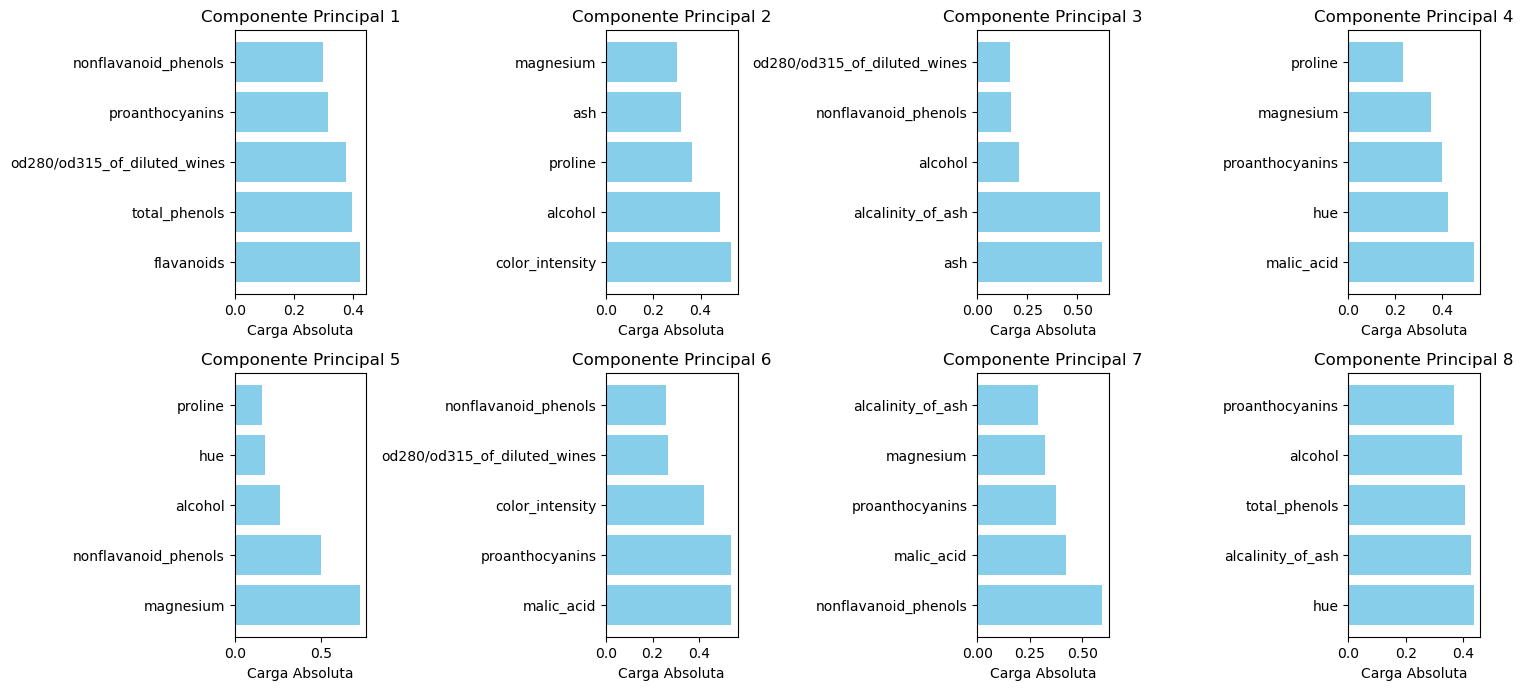

In [46]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

Las muestras fueron tomadas a partir de un conjunto de datos preexistente de vinos, y fueron procesadas mediante estandarización y reducción de dimensionalidad (PCA) para facilitar un análisis más eficiente. Además, se dividieron en subconjuntos de entrenamiento y prueba validar el modelo, en este caso se uso 70% para entrenar el modelo y 30% para el testeo.

In [47]:
# Cargar dataset con el target
wine_type= load_wine().target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pc_df, wine_type, train_size = 0.7, random_state=1234)

# Crear y entrenar el clasificador Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
labels = model.predict(X_test)



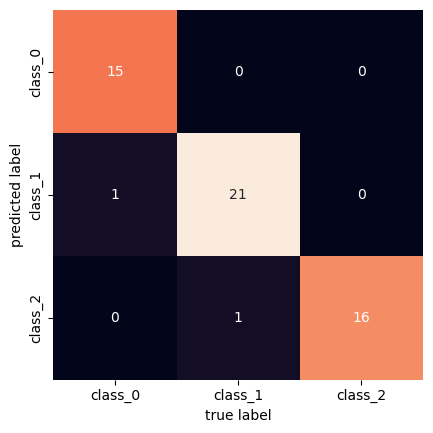

In [48]:
# Crear la matriz de confunsión
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_wine().target_names, yticklabels=load_wine().target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:

# Extraer verdaderos positivos, falsos positivos, falsos negativos
TP = np.diag(mat)
FP = mat.sum(axis=0) - TP
FN = mat.sum(axis=1) - TP
TN = mat.sum() - (FP + FN + TP)

# Calcular las métricas
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = np.sum(TP) / np.sum(mat)

# Mostrar los resultados
print(f'Precisión por clase: {precision}')
print(f'Recall por clase: {recall}')
print(f'Puntuación F1 por clase: {f1}')
print(f'Exactitud: {accuracy:.2f}')

Precisión por clase: [1.         0.95454545 0.94117647]
Recall por clase: [0.9375     0.95454545 1.        ]
Puntuación F1 por clase: [0.96774194 0.95454545 0.96969697]
Exactitud: 0.96


### 3.  Ejecute el clasificador
## Interpretación de los resultados del modelo con PCA con 8 componentes principales

- La precisión para los tres tipos de vino fueron de es un 100%, 95% y 94% respectivamente, significa que cuando el modelo predijo que un vino es de tipo 1, acertó el 100% de las veces, el tipo 2 en un 95% y el tipo 3 en 94%.

- El recall para los tres tipos de vino fueron de es un 94%, 95% y 100% respectivamente, significa que el modelo detectó correctamente el 94% de todos los vinos que realmente eran de tipo 1, pero el 6% restante fueron clasificados incorrectamente como otros tipos. El modelo identificó correctamente el 95% de los vinos que eran de tipo 2. El modelo detectó el 100% de los vinos que realmente eran de tipo 3.

- El F1-score para los tres tipos de vino fueron de es un 97%, 95% y 97% respectivamente, indica un buen balance entre precisión y recall.

- La exactitud del modelo fue 96%, lo que nos indica el modelo esta clasificando correctamente los tres tipos de vinos.

### Argumentación de porque no se utlizo el método Fine- Tunning

Dado los resultados de la matriz de confusión, el modelo ya muestra un rendimiento alto en términos de exactitud, precisión, recall, y F1-score (todos superior al 90%),  no es necesario realizar fine-tuning adicional. 

#### 4. Conclusión

Con el análisis de datos, pudimos entender de las características y la preparación adecuada de los datos (por ejemplo la estandarización) son cruciales para el rendimiento de cualquier modelo de machine learning en este caso PCA. 

Con el modelo PCA, comprendimos como elegir  del número adecuado de componentes es prinxipales para equilibrar la reducción de dimensionalidad y la retención de información, es nuestro caso fue 8 componentes, con una varianza acumulada del 92%.

Y último, con el clasificador Naive Bayes, se evaluó el rendimiento del modelo mediante una matriz de confusión y métricas asociadas, como precisión, recall, F1-score y exactitud.

En conclusión, el análisis de datos, el modelo de PCA y la clasificación con Naive Bayes forman un flujo de trabajo sólido para la clasificación de vinos. La integración de estas técnicas permite una comprensión profunda de los datos, una reducción efectiva de la complejidad y una evaluación precisa del rendimiento del modelo.